In [1]:
#import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataframe
alabama=pd.read_table(r"C:\Users\admin\Desktop\projects\Alabama_Combined.txt",sep=",")

In [3]:
#previewing the first five rows of the dataset
alabama.head()

,Interviewee,M/F,Age,Where interviewed,When interviewed,Interviewer,Where enslaved,Latitude,Longitude,Type of slave,Where interviewed.1,State Where Interviewed,Longitude.1,Latitude.1
0,"Aarons, Charlie",M,Unknown,"Oak Grove, AL",1937-08-04T00:00:00Z,Mary Poole,"Petersberg, VA",37.227928,-77.401927,Field,"Oak Grove, AL",AL,-86.299410,33.191782
1,"Aarons, Charlie",M,Unknown,"Oak Grove, AL",1937-08-04T00:00:00Z,Mary Poole,"Jasper County, MS",32.081043,-89.170600,Field,"Oak Grove, AL",AL,-86.299410,33.191782
2,"Abercrombie, Anthony",M,100,"Uniontown, AL",1937-08-04T00:00:00Z,Susie R. O’Brien,"Marion, Bibb county, AL",32.632354,-87.319165,Unknown,"Uniontown, AL",AL,-87.514169,32.449580
3,"Abercrombie, Anthony",M,100,"Uniontown, AL",1937-08-04T00:00:00Z,Susie R. O’Brien,"Perry county, AL",32.598888,-87.301613,Unknown,"Uniontown, AL",AL,-87.514169,32.449580
4,"Ammond (Ammonds), Molly",F,Unknown,"Eufaula, AL",1937-05-25T00:00:00Z,Gertha Couric,"Eufaula, AL (5 miles west)",31.891272,-85.233815,House,"Eufaula, AL",AL,-85.145488,31.891272


In [4]:
alabama.shape

(158, 14)

In [5]:
alabama.columns

Index(['Interviewee', 'M/F', 'Age', 'Where interviewed', 'When interviewed',
       'Interviewer', 'Where enslaved', 'Latitude', 'Longitude',
       'Type of slave', 'Where interviewed.1', 'State Where Interviewed',
       'Longitude.1', 'Latitude.1'],
      dtype='object')

In [6]:
#renaming some of the columns to a much shorter form
alabama.rename(columns={'When interviewed':'date','State Where Interviewed':'State'},inplace=True)

In [7]:
#missing data 
alabama.isnull().sum()

Interviewee             0
M/F                     0
Age                     0
Where interviewed       8
date                   12
Interviewer             1
Where enslaved         14
Latitude               15
Longitude              15
Type of slave           0
Where interviewed.1     8
State                   8
Longitude.1             8
Latitude.1              8
dtype: int64

In [8]:
#some of the missing data are in form of langitudes ,longitudes and date
#these data can not be replaces easily and I therefore resorted to dropping them.
alabama.dropna(inplace=True)

In [9]:
#after dropping the missing values how many slaves did we remain with.
alabama.shape

(125, 14)

In [10]:
#juat to confirm that all the null values were dropped.
alabama.isnull().sum()

Interviewee            0
M/F                    0
Age                    0
Where interviewed      0
date                   0
Interviewer            0
Where enslaved         0
Latitude               0
Longitude              0
Type of slave          0
Where interviewed.1    0
State                  0
Longitude.1            0
Latitude.1             0
dtype: int64

In [11]:
#confirming the datatypes of the variables/feautures of the alabama dataset
alabama.dtypes

Interviewee             object
M/F                     object
Age                     object
Where interviewed       object
date                    object
Interviewer             object
Where enslaved          object
Latitude               float64
Longitude              float64
Type of slave           object
Where interviewed.1     object
State                   object
Longitude.1            float64
Latitude.1             float64
dtype: object

In [12]:
# I realise that the age was of a string/object data type which shouldn't have been the case.
#lets see the value count of age to confirm the resaon for this data type.
alabama.Age.value_counts()

Unknown    47
100        10
85          7
87          5
90          5
89          5
84          5
86          5
82          4
80          4
83          3
93          3
78          3
79          3
92          2
112         2
107         2
96          2
113         1
69          1
91          1
105         1
94          1
101         1
73          1
95          1
Name: Age, dtype: int64

### From the series above it is observed that that about 47 individuals did not had there age indicated.Dropping the above 47 could have resulted into a massive data loss considering I had earlier dropped another large number of missing values. I therefore decided to replace the unknown with the mode age wchich was 100 years old and then converted the age from object to float

In [13]:
Age=alabama.Age.str.replace('Unknown','100').astype(float)

In [14]:
alabama.Age.str.replace('Unknown','100').astype(float).max()

113.0

In [15]:
alabama.Age.str.replace('Unknown','100').astype(float).mean()

93.416

In [16]:
alabama.Age=Age

In [17]:
alabama.Age.mean()

93.416

In [18]:
alabama.describe()

,Age,Latitude,Longitude,Longitude.1,Latitude.1
count,125.000000,125.000000,125.000000,125.000000,125.000000
mean,93.416000,33.120130,-85.756030,-86.826276,32.290450
std,8.809987,1.821671,3.383698,1.163533,1.023324
min,69.000000,30.224090,-92.019843,-88.315654,30.385426
25%,86.000000,32.174314,-88.069646,-88.044640,31.891272
50%,100.000000,32.584302,-86.661108,-86.848506,32.460976
75%,100.000000,33.377849,-85.041367,-85.396277,32.645412
max,113.000000,38.342773,-77.401927,-84.987709,34.770172


In [19]:
alabama.columns

Index(['Interviewee', 'M/F', 'Age', 'Where interviewed', 'date', 'Interviewer',
       'Where enslaved', 'Latitude', 'Longitude', 'Type of slave',
       'Where interviewed.1', 'State', 'Longitude.1', 'Latitude.1'],
      dtype='object')

In [20]:
alabama.groupby("date")['Age'].sum()

date
1936-12-18T00:00:00Z     87.0
1937-02-16T00:00:00Z    180.0
1937-04-20T00:00:00Z    105.0
1937-04-22T00:00:00Z    100.0
1937-04-23T00:00:00Z    387.0
1937-04-27T00:00:00Z    170.0
1937-05-04T00:00:00Z    183.0
1937-05-05T00:00:00Z    292.0
1937-05-07T00:00:00Z    100.0
1937-05-09T00:00:00Z    300.0
1937-05-10T00:00:00Z    224.0
1937-05-12T00:00:00Z    174.0
1937-05-13T00:00:00Z     96.0
1937-05-14T00:00:00Z    200.0
1937-05-25T00:00:00Z    200.0
1937-05-27T00:00:00Z    180.0
1937-05-28T00:00:00Z     78.0
1937-05-29T00:00:00Z     90.0
1937-05-31T00:00:00Z    200.0
1937-06-01T00:00:00Z    100.0
1937-06-02T00:00:00Z    738.0
1937-06-03T00:00:00Z    182.0
1937-06-04T00:00:00Z    458.0
1937-06-06T00:00:00Z     83.0
1937-06-07T00:00:00Z    113.0
1937-06-08T00:00:00Z    275.0
1937-06-09T00:00:00Z    177.0
1937-06-10T00:00:00Z    258.0
1937-06-11T00:00:00Z     78.0
1937-06-14T00:00:00Z     84.0
1937-06-15T00:00:00Z    291.0
1937-06-17T00:00:00Z    293.0
1937-06-18T00:00:00Z    100.0
1937-

In [21]:
alabama.isnull().sum()

Interviewee            0
M/F                    0
Age                    0
Where interviewed      0
date                   0
Interviewer            0
Where enslaved         0
Latitude               0
Longitude              0
Type of slave          0
Where interviewed.1    0
State                  0
Longitude.1            0
Latitude.1             0
dtype: int64

In [22]:
pd.crosstab(alabama.Age,alabama['Where enslaved'])

Where enslaved,"5 miles north of Livingston, AL","6 miles northeast of Livingston, AL","8 miles north of Livingston, AL","Americus, GA","Augusta County, AL","Baldwin County, AL","Barton, AL","Bell's Landing, AL","Bolivar Counry, MS","Bullock County, AL",...,"Tuscaloosa, AL","Tuscumbia, AL","Tuskegee, AL","Uniontown, AL",VA,"Vicksburg, MS","Ward, AL","West Point, MS","White Oak, AL","Youngsboro, AL"
Age,,,,,,,,,,,,,,,,,,,,,
69.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82.0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
83.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
84.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,2,1,0,0,0,0,0


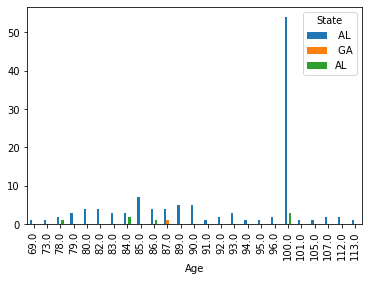

In [23]:
pd.crosstab(alabama.Age,alabama.State).plot(kind="bar")

# sex distribution plot for the slaves.

Text(0.5, 1.0, 'slaves distribution according to gender')

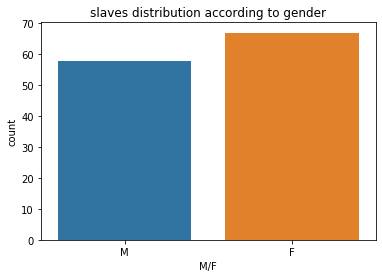

In [24]:
#plot showing gender distributions of slaves in alabama.
sns.countplot(x='M/F',data=alabama)
plt.title('slaves distribution according to gender')

Text(0.5, 1.0, 'alabama slaves age distribution')

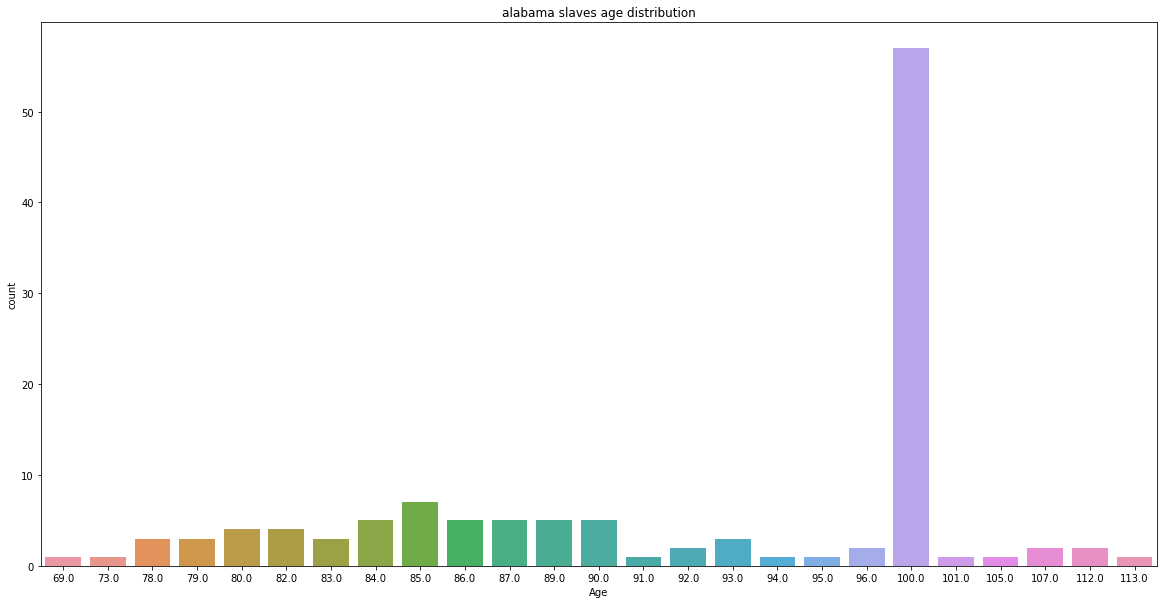

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age',data=alabama)
plt.title('alabama slaves age distribution')

Text(0.5, 1.0, 'slaves distribution in alabama states')

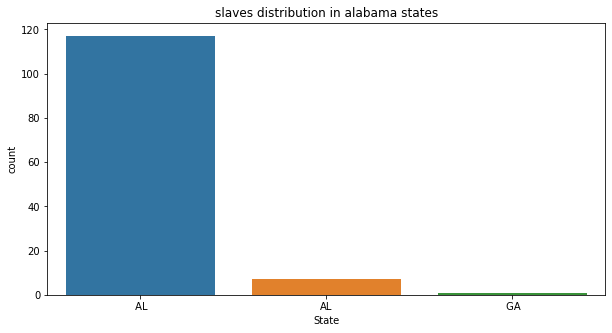

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='State',data=alabama)
plt.title('slaves distribution in alabama states')

<Figure size 1440x720 with 0 Axes>

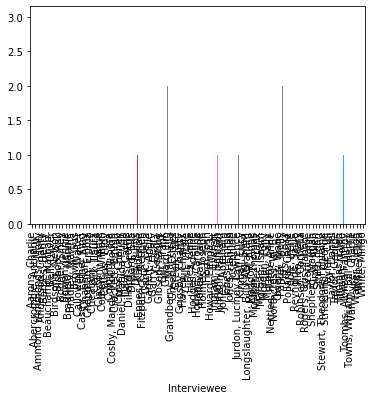

In [27]:
plt.figure(figsize=(20,10))
pd.crosstab(alabama.Interviewee,alabama.Interviewer).plot(kind='bar',legend=None)

In [ ]:
#Please re -do the cahrt below using buzzword instead.

In [28]:
alabama.Interviewee.value_counts(normalize=False)

Dillard, George     3
Garlic, Delia       3
Chapman, Emma       2
Hodges, Adeline     2
Calloway, Walter    2
                   ..
Ingram, Everett     1
Bowen, Jennie       1
Clayton, Hattie     1
Walker, Simon       1
Eppes, Katherine    1
Name: Interviewee, Length: 99, dtype: int64